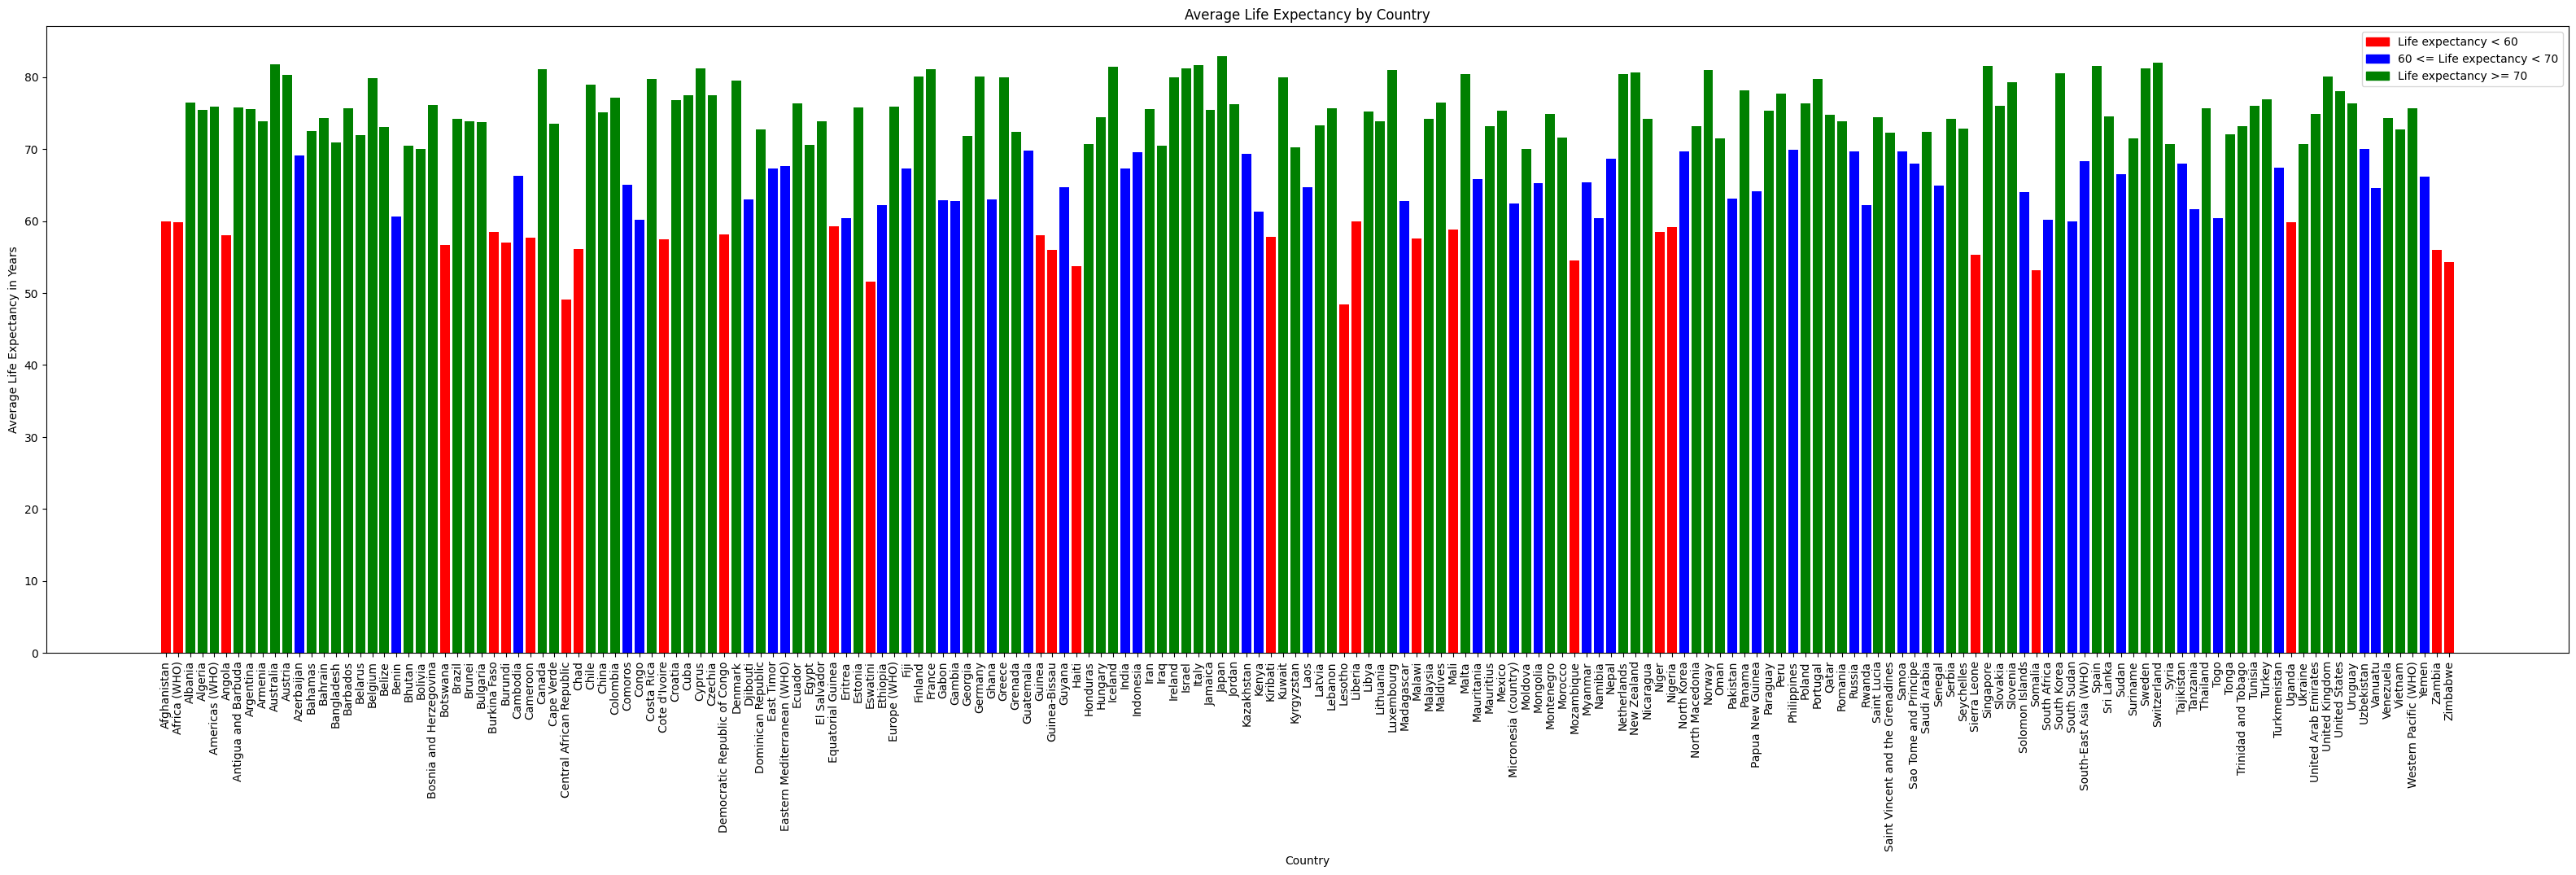

In [1]:
import matplotlib.pyplot as plt
import csv
import matplotlib.patches as mpatches
import pandas as pd


# Load CSV Data
with open("data/life-expectancy-data/life-expectancy.csv") as file:
    reader = csv.reader(file)
    header = next(reader) # Entity,Code,Year,Life expectancy at birth (years) - Sex: both sexes
    countries = []
    life_expectancies = []
    cluster = 0
    sum = 0
    for row in reader:
        # calculate average for years 2000 - 2019 
        cluster = (cluster + 1) % 4
        if cluster % 4 != 0:
            sum += float(row[3])
        else:
            life_expectancies.append((sum + float(row[3]))/ 4)
            sum = 0
            countries.append(row[0])

# Create DataFrame
life_expectancies_df = pd.DataFrame({
    "Country": countries,
    "Average Life Expectancy": life_expectancies
})

# Create a color list based on life expectancy values
colors = ['red' if le < 60 else 'blue' if le < 70 else 'green' for le in life_expectancies_df["Average Life Expectancy"]]


# Create a bar plot
plt.figure(figsize=(40,10))
bars = plt.bar(life_expectancies_df["Country"], life_expectancies_df["Average Life Expectancy"], color=colors, width=0.8)
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy in Years')
plt.title('Average Life Expectancy by Country')
plt.xticks(rotation=90)

# Create a legend
red_patch = mpatches.Patch(color='red', label='Life expectancy < 60')
yellow_patch = mpatches.Patch(color='blue', label='60 <= Life expectancy < 70')
green_patch = mpatches.Patch(color='green', label='Life expectancy >= 70')
plt.legend(handles=[red_patch, yellow_patch, green_patch])



plt.show()

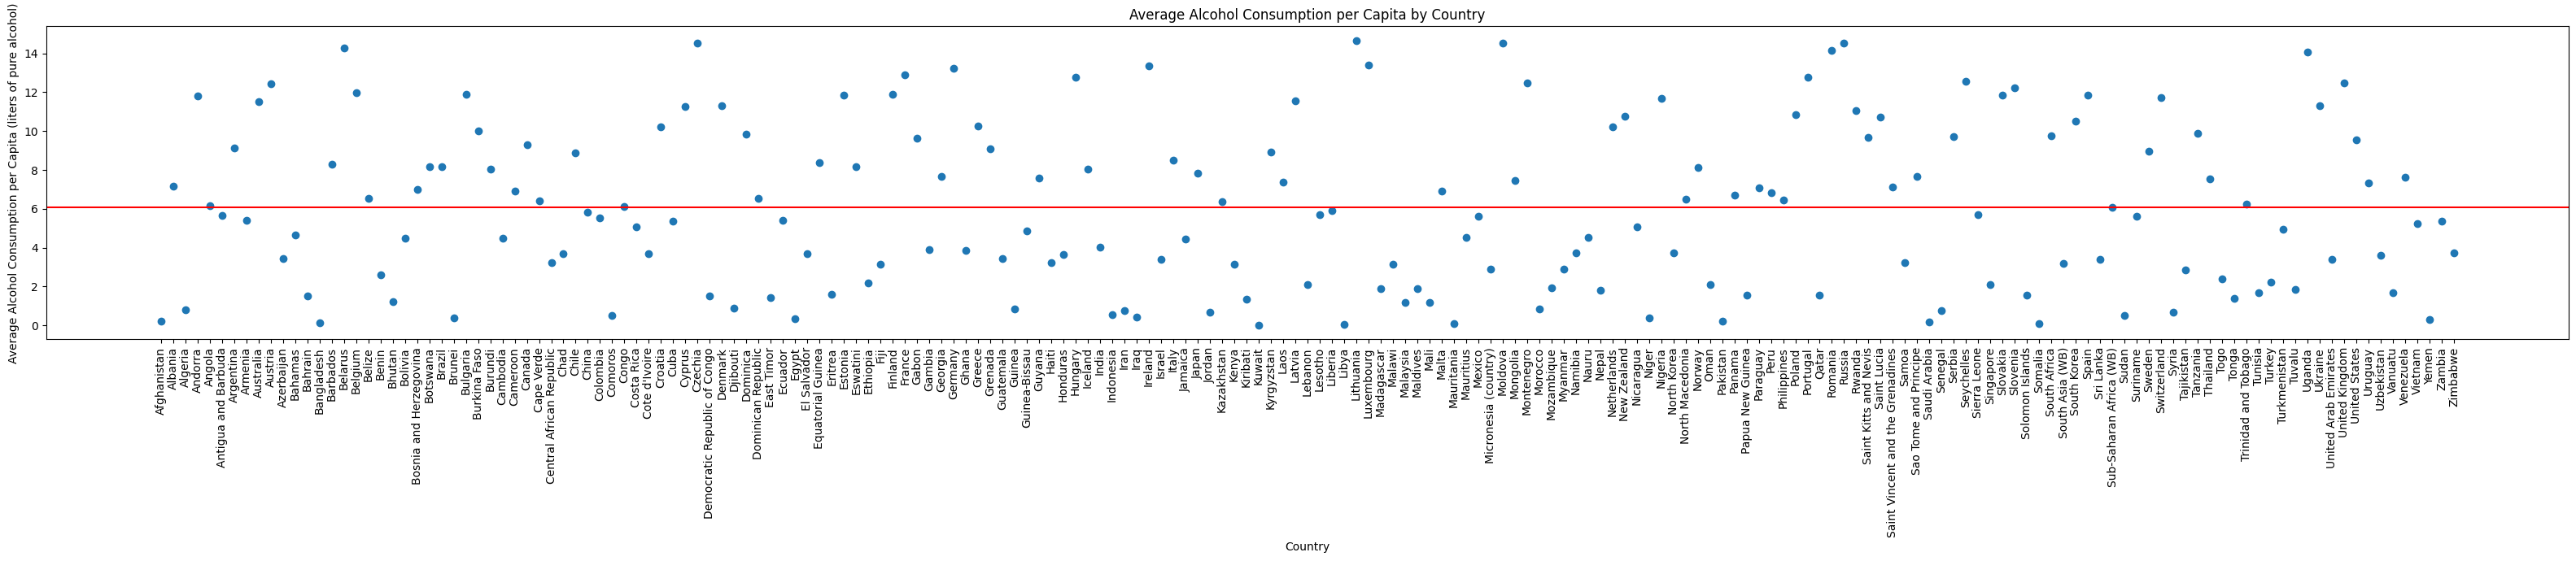

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV Data
data = pd.read_csv("data/alcohol-consumption-data/alcohol-consumption.csv", delimiter=',') # Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
grouped_data = data.groupby("Entity")

# Calculate average alcohol consumption
alcohol_consumptions = grouped_data["Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"].mean()
alcohol_consumptions_df = alcohol_consumptions.reset_index()

# Rename columns
alcohol_consumptions_df.columns = ['Country', 'Average Alcohol Consumption']
# Calculate overall mean
overall_mean = alcohol_consumptions.mean()

# Create a scatter plot
plt.figure(figsize=(40,5))
plt.scatter(alcohol_consumptions_df["Country"], alcohol_consumptions_df["Average Alcohol Consumption"])
plt.axhline(y=overall_mean, color='r', linestyle='-')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Average Alcohol Consumption per Capita (liters of pure alcohol)')
plt.title('Average Alcohol Consumption per Capita by Country')

plt.show()

Correlation coefficient: 0.366744205672364


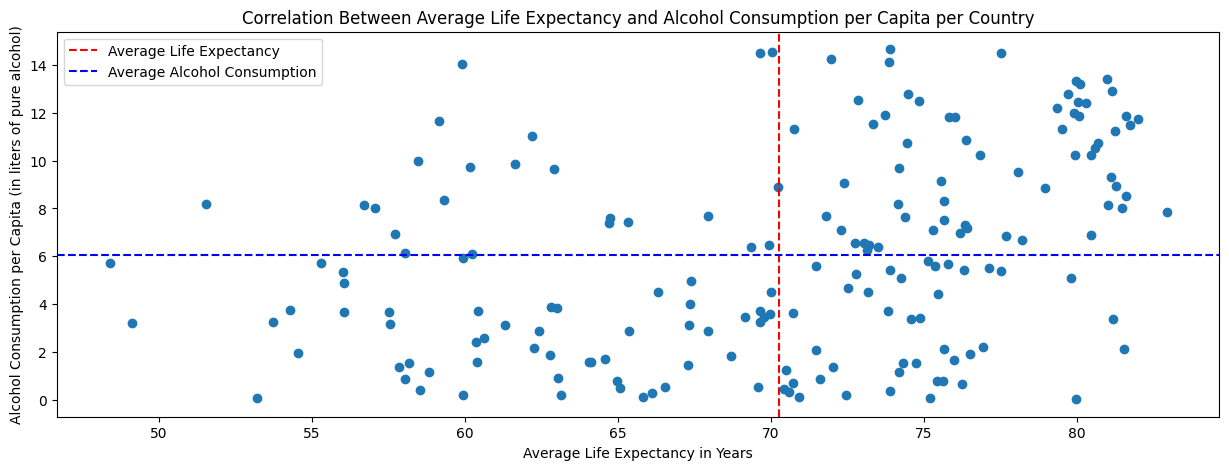

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Merge DataFrames
merged_data = pd.merge(life_expectancies_df, alcohol_consumptions_df, on="Country")

# Create scatter plot
plt.figure(figsize=(15,5))
plt.scatter(merged_data["Average Life Expectancy"], merged_data["Average Alcohol Consumption"])
plt.xlabel('Average Life Expectancy in Years')
plt.ylabel('Alcohol Consumption per Capita (in liters of pure alcohol)')
plt.title('Correlation Between Average Life Expectancy and Alcohol Consumption per Capita per Country')

# Calculate and print the correlation coefficient
correlation = merged_data['Average Life Expectancy'].corr(merged_data['Average Alcohol Consumption'])
print(f'Correlation coefficient: {correlation}')

# Calculate and plot the average life expectancy and average consumption
avg_life_expectancy = merged_data['Average Life Expectancy'].mean()
avg_consumption = merged_data['Average Alcohol Consumption'].mean()

plt.axvline(x=avg_life_expectancy, color='r', linestyle='--', label='Average Life Expectancy')
plt.axhline(y=avg_consumption, color='b', linestyle='--', label='Average Alcohol Consumption')

plt.legend()
plt.show()